<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


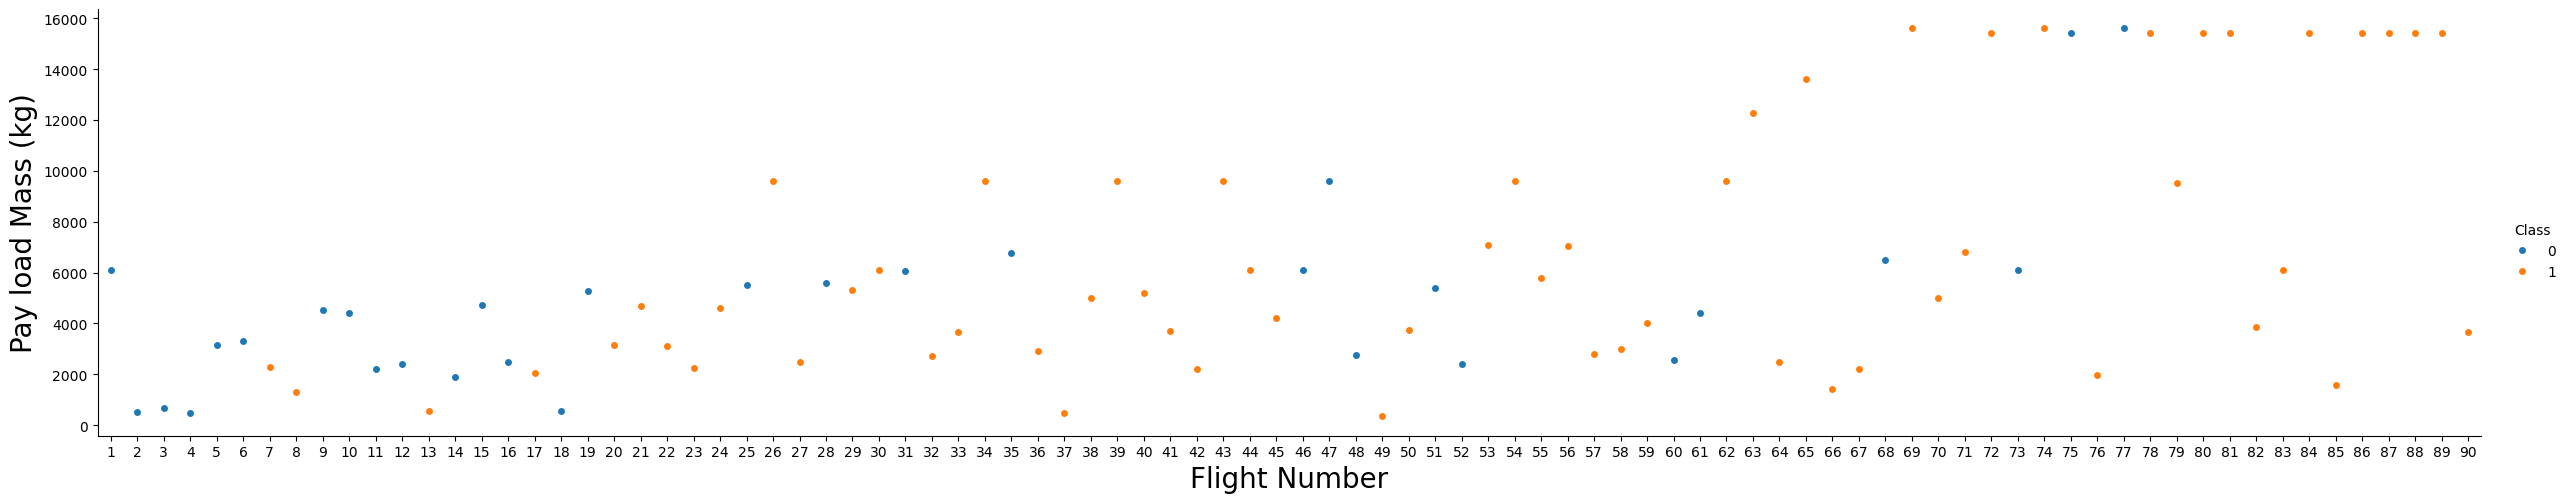

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


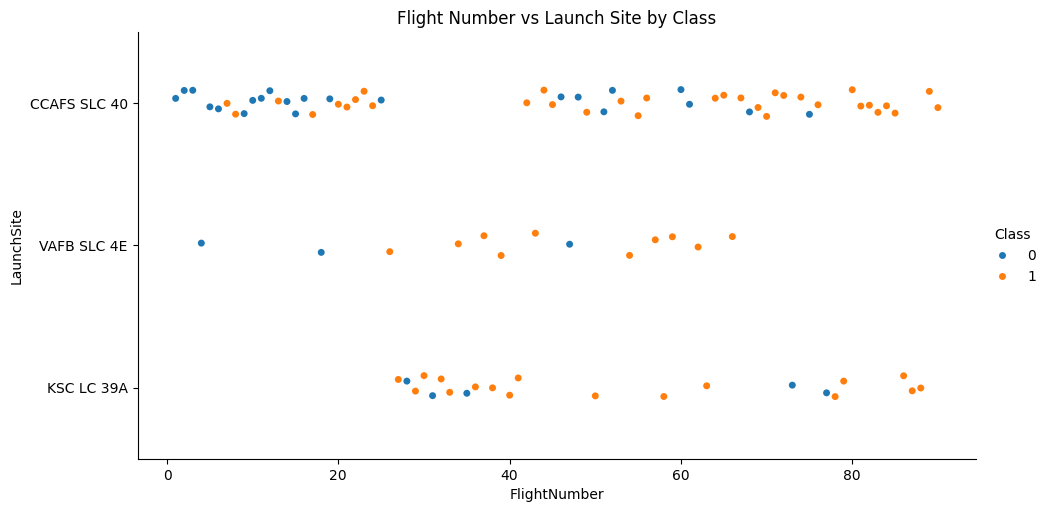

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',
    kind='strip',
    height=5,
    aspect=2
)
plt.title('Flight Number vs Launch Site by Class')
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Al observar la relación entre el número de vuelo (FlightNumber) y el sitio de lanzamiento (Launch_Site), con la clase (Class) indicando éxito (1) o fallo (0), se identifican los siguientes patrones:

El sitio CCAFS SLC 40 muestra la mayor cantidad de vuelos, distribuidos de manera uniforme en todo el rango de FlightNumber. Con el tiempo, la proporción de lanzamientos exitosos (Class = 1, en naranja) parece aumentar.

KSC LC 39A comienza a utilizarse a partir de aproximadamente el vuelo número 25. Todos los lanzamientos desde este sitio parecen estar más concentrados en los vuelos recientes, con una proporción alta de éxitos.

VAFB SLC 4E tiene menos vuelos en total, pero muestra una mezcla más equilibrada de éxitos y fallos. Este sitio parece menos usado y no presenta una tendencia clara en la evolución de los resultados.

En general, los primeros vuelos tienen más fallos, especialmente en CCAFS SLC 40, lo que puede reflejar una curva de aprendizaje tecnológica o fases de prueba.

### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


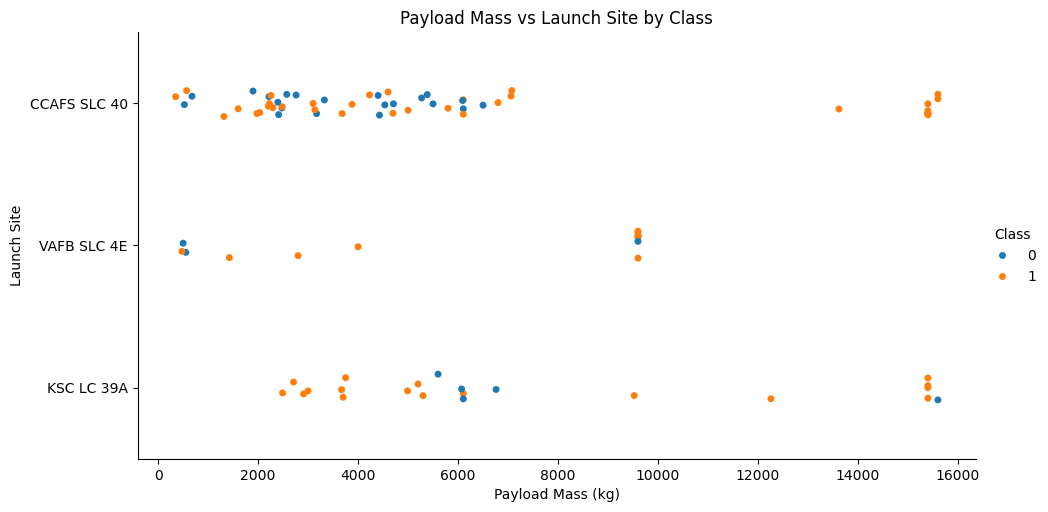

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(
    data=df,
    x="PayloadMass",      # nombre exacto de la columna según tu base
    y="LaunchSite",            # columna de sitio de lanzamiento
    hue="Class",                # éxito (1) o fallo (0)
    kind="strip",
    height=5,
    aspect=2
)

plt.title("Payload Mass vs Launch Site by Class")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


Al observar la relación entre la masa de carga útil (Payload Mass) y el sitio de lanzamiento (Launch Site), diferenciando los éxitos y fallos mediante la variable Class, se aprecian los siguientes patrones:

CCAFS SLC 40 presenta una amplia gama de cargas útiles, desde valores bajos hasta cargas extremadamente altas (más de 15.000 kg). Este sitio muestra tanto lanzamientos exitosos como fallidos para distintas masas.

KSC LC 39A también gestiona lanzamientos con cargas elevadas, similares a CCAFS, y en su mayoría exitosos. Esto sugiere que es una plataforma confiable para misiones con alta demanda de carga.

VAFB SLC 4E, en cambio, no muestra lanzamientos con cargas útiles mayores a 10.000 kg, lo que indica que este sitio se utiliza principalmente para misiones de carga media o baja. Podría estar limitado por infraestructura, tipo de misión o ubicación geográfica.

No parece haber una fuerte correlación entre el aumento de carga útil y el aumento de fallos; incluso las misiones más pesadas en general se asocian con lanzamientos exitosos, especialmente en KSC LC 39A y CCAFS SLC 40.



### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


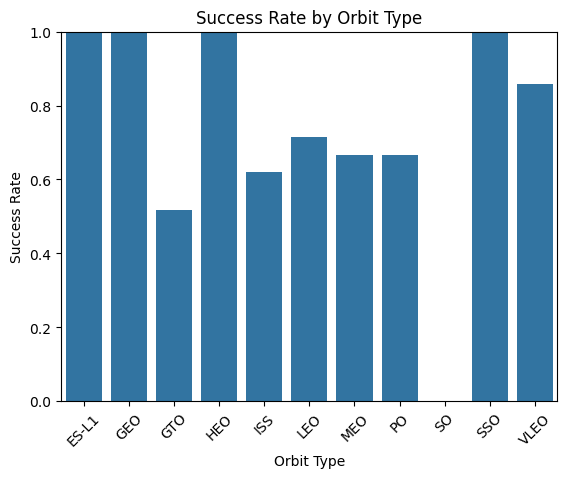

In [11]:
# HINT use groupby method on Orbit column and get the mean of Class column

orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Gráfico de barras
sns.barplot(data=orbit_success, x="Orbit", y="Class")
plt.title("Success Rate by Orbit Type")
plt.ylabel("Success Rate")
plt.xlabel("Orbit Type")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # para que el eje vaya de 0 a 100%
plt.show()

Analyze the plotted bar chart to identify which orbits have the highest success rates.


El gráfico de barras muestra la tasa de éxito promedio de los lanzamientos agrupados por tipo de órbita. A partir de esta visualización se destacan los siguientes puntos:

Órbitas con tasa de éxito del 100%:

ES-L1, GEO, HEO y SSO presentan una tasa de éxito perfecta, lo que indica que todos los lanzamientos dirigidos a estas órbitas han sido exitosos.

Estas órbitas podrían representar misiones bien dominadas técnicamente o con bajo riesgo operativo.

Órbitas con éxito alto (más del 85%):

VLEO también muestra una alta tasa de éxito (~0.87), posicionándose como una órbita confiable.

Órbitas con tasa de éxito intermedia:

LEO, MEO, PO, e ISS muestran tasas entre el 60% y 75%. Esto indica una probabilidad razonable de éxito, aunque no tan alta como las anteriores.

Órbita con menor tasa de éxito:

GTO (Geostationary Transfer Orbit) es la única órbita que se encuentra por debajo del 55%, lo que sugiere mayores desafíos técnicos, condiciones más exigentes o historial de fallos.

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


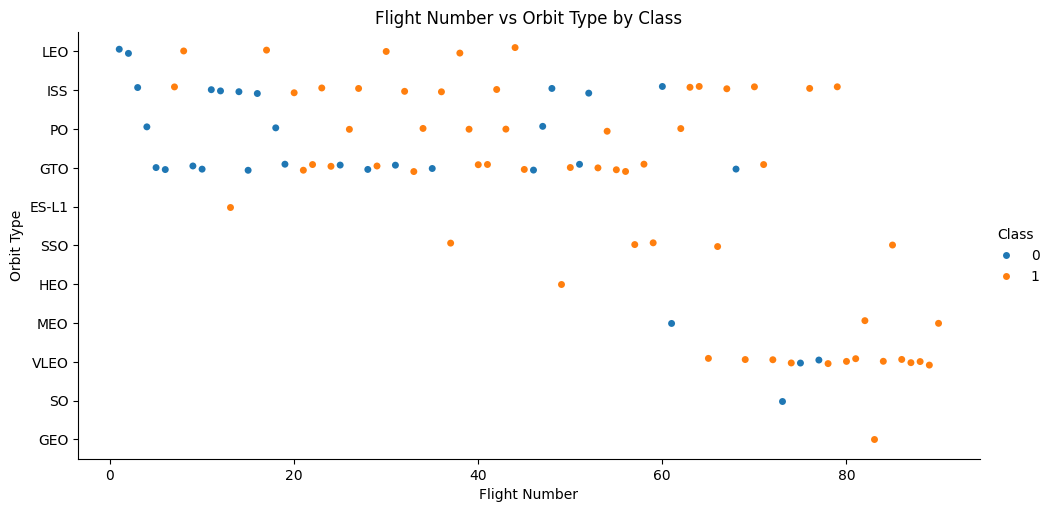

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.catplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    kind="strip",
    height=5,
    aspect=2
)

plt.title("Flight Number vs Orbit Type by Class")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


LEO (Low Earth Orbit):

Se observa una clara tendencia a que los vuelos con mayor número de misión (es decir, más recientes) tienden a ser más exitosos.

Esto sugiere una curva de aprendizaje positiva, con mejoras tecnológicas y operativas acumuladas a lo largo del tiempo.

GTO (Geostationary Transfer Orbit):

La tasa de éxito no muestra una correlación aparente con el número de vuelo.

Éxitos y fracasos están distribuidos aleatoriamente, lo que puede indicar que el éxito en GTO depende más de factores técnicos complejos o externos que de la experiencia acumulada.

SSO, VLEO, HEO y otras órbitas:

En varias órbitas secundarias se observan principalmente lanzamientos exitosos (puntos naranjas), pero el número de datos es menor.

Algunas parecen haberse comenzado a utilizar solo en etapas recientes (por ejemplo, VLEO aparece a partir de FlightNumber ≈ 70).

### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


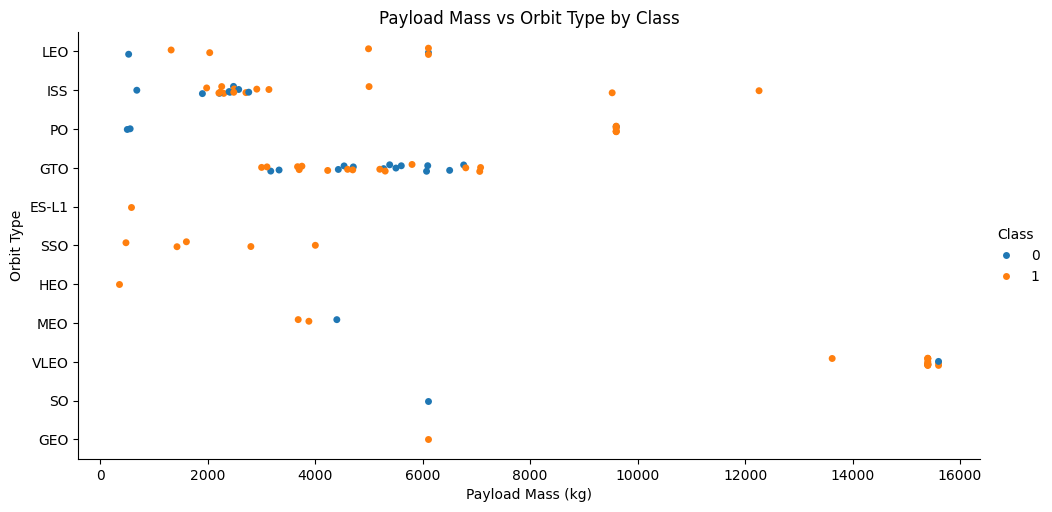

In [14]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    kind="strip",
    height=5,
    aspect=2
)

plt.title("Payload Mass vs Orbit Type by Class")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


Órbitas LEO, PO e ISS:

Se observa una concentración de cargas medianas y pesadas (3000–7000 kg) con una alta proporción de lanzamientos exitosos.

Esto sugiere que estas órbitas son altamente compatibles con misiones de carga pesada y que la tecnología asociada a estas misiones es más madura.

Órbita GTO:

Presenta una distribución de cargas bastante homogénea entre 4000 y 7000 kg.

Sin embargo, tanto lanzamientos exitosos como fallidos están presentes, lo que dificulta establecer una relación clara entre la masa de carga útil y el éxito en esta órbita.

Esto podría reflejar la complejidad técnica de alcanzar GTO o las mayores exigencias del perfil de misión.

Órbitas con cargas más livianas (SSO, ES-L1, GEO):

Tienden a mostrar cargas menores a 4000 kg.

A pesar de la menor masa, estas órbitas presentan principalmente lanzamientos exitosos, lo cual es consistente con sus altas tasas de éxito observadas previamente.

VLEO y HEO:

Presentan cargas más pesadas, con tendencia a ser exitosas, pero con pocos datos, por lo que se requiere mayor cantidad de observaciones para establecer conclusiones sólidas.



### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [15]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


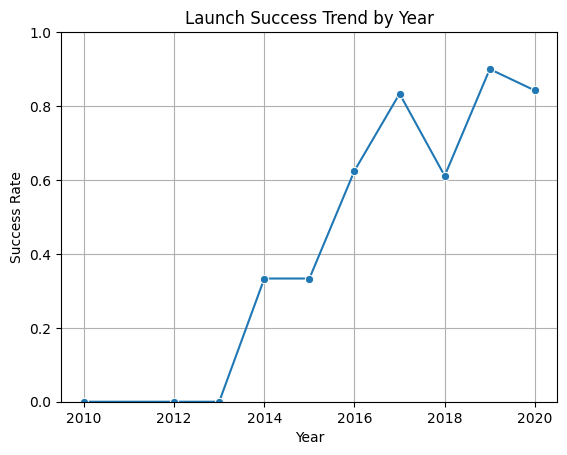

In [16]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

df['Date'] = df['Date'].astype(int)

# Agrupar por año y calcular la tasa de éxito promedio
yearly_success = df.groupby('Date')['Class'].mean().reset_index()

# Gráfico de línea
sns.lineplot(data=yearly_success, x='Date', y='Class', marker='o')
plt.title("Launch Success Trend by Year")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1)  # tasa de éxito entre 0 y 1
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


2010 a 2013:

La tasa de éxito fue nula (0%), lo que refleja un período inicial de pruebas o mayor inestabilidad tecnológica en los lanzamientos.

2014 a 2015:

Comienza un cambio positivo con una tasa de éxito del 33%, indicando las primeras misiones exitosas.

Probablemente refleja mejoras en diseño de cohetes, protocolos de lanzamiento y control de calidad.

2016 a 2019:

Se observa un incremento sostenido, con picos en 2017 (~83%) y 2019 (~91%).

Esto evidencia una maduración tecnológica y operacional de los lanzamientos.

2020:

La tasa se mantiene alta (84%), lo que sugiere consolidación en la capacidad de lanzar con éxito.



## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
